In [1]:
# -*- coding:utf-8 -*-
# Author : Younger Huang
# Date : 2023.11.15

import os, librosa
import numpy as np
import soundfile as sf

def nlms(x, d, N = 4, mu = 0.1):
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        e_n = d[n] - np.dot(u, w)
        w = w + mu * e_n * u / (np.dot(u, u) + 1e-3)
        e[n] = e_n
    return e

if __name__ == '__main__':
    x, sr = librosa.load(r'./res_6/x.wav', sr = 16000)
    v, sr = librosa.load(r'./res_6/d.wav', sr = 16000)
    e = nlms(x, v, N = 256, mu = 0.1)
    out_res_dir = './res_9_nlms/'
    os.makedirs(out_res_dir, exist_ok = True)
    sf.write('%sx.wav'%(out_res_dir), x, sr, subtype = 'PCM_16')
    sf.write('%sd.wav'%(out_res_dir), v, sr, subtype = 'PCM_16')
    sf.write('%snlms.wav'%(out_res_dir), e, sr, subtype = 'PCM_16')

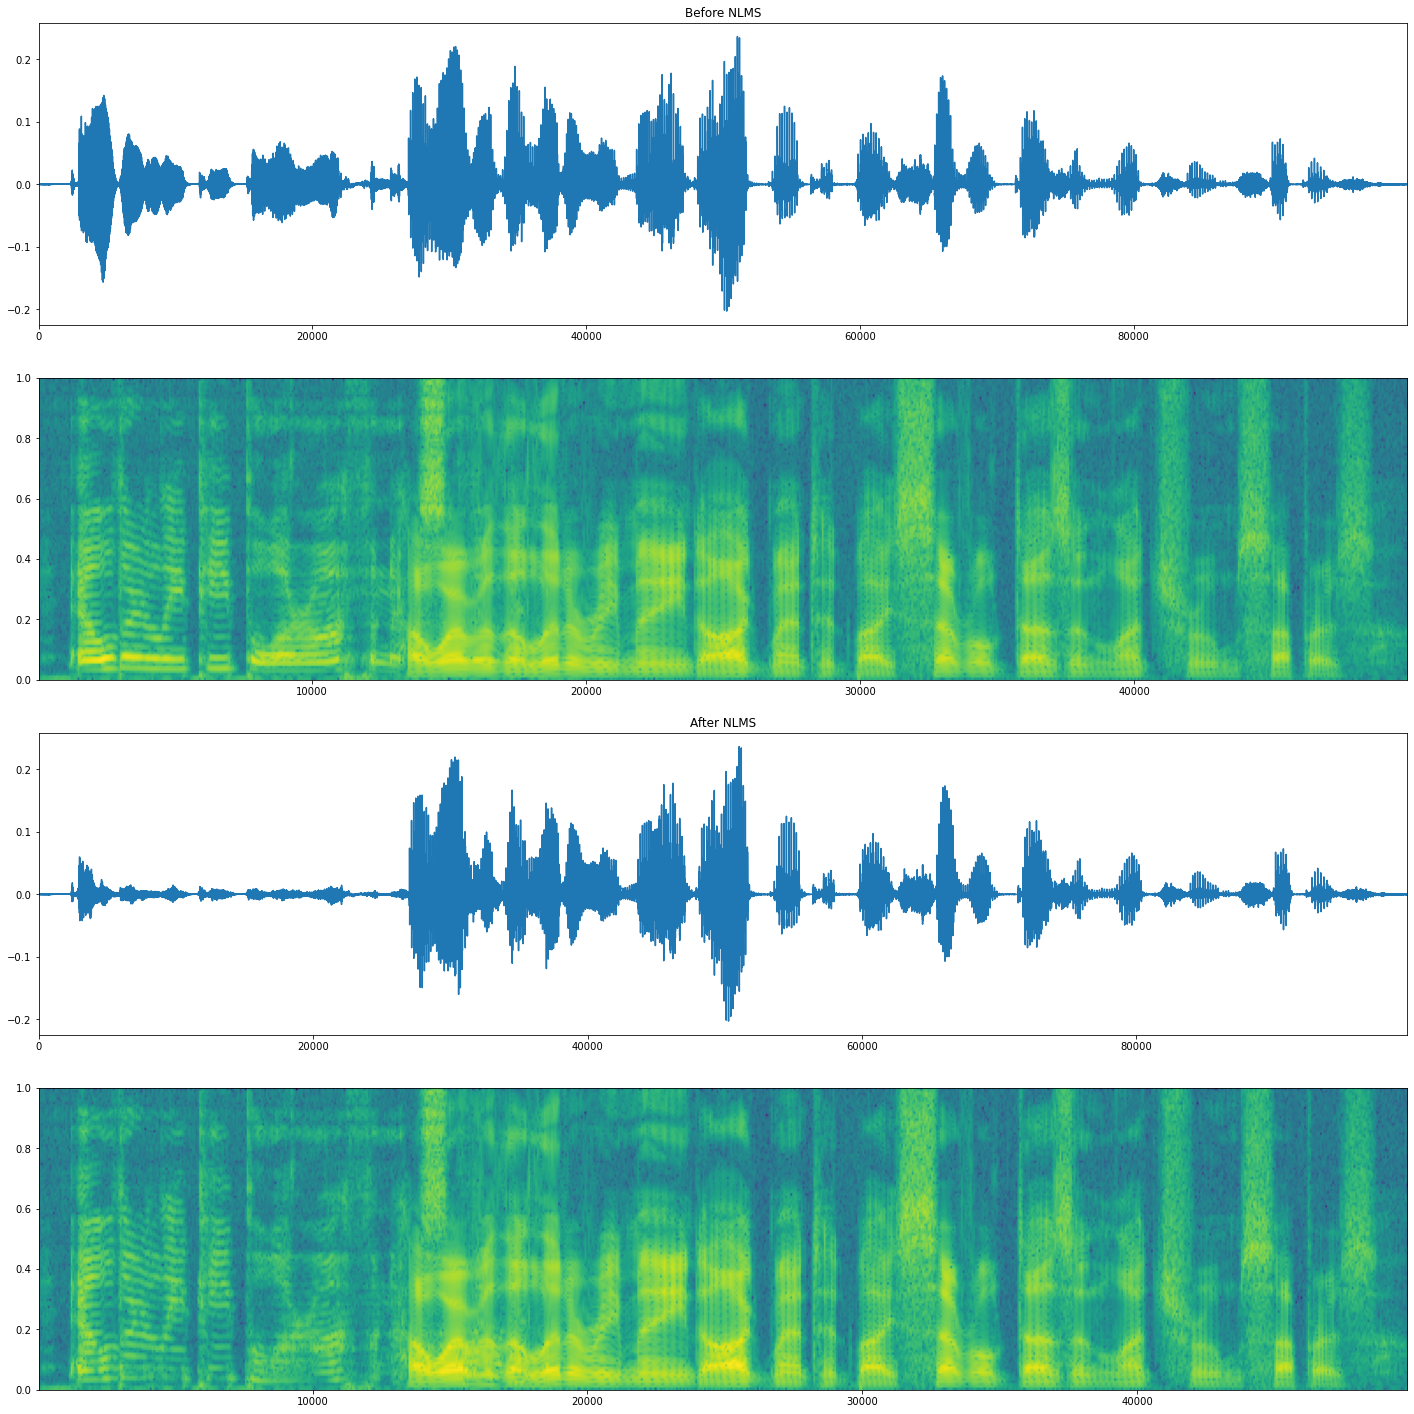

In [2]:
import matplotlib.pyplot as plt

before_lms = './res_9_nlms/d.wav'
after_lms = './res_9_nlms/nlms.wav'
before_lms_wav = sf.read(before_lms)[0]
after_lms_wav = sf.read(after_lms)[0]

plt.figure(figsize = (20, 20))
plt.subplot(411)
plt.plot(before_lms_wav)
plt.xlim((0, len(before_lms_wav)))
plt.title('Before NLMS')
plt.subplot(412)
plt.specgram(before_lms_wav)
plt.subplot(413)
plt.plot(after_lms_wav)
plt.xlim((0, len(after_lms_wav)))
plt.title('After NLMS')
plt.subplot(414)
plt.specgram(after_lms_wav)
plt.tight_layout(pad = 2, w_pad = 2)
plt.savefig('./before_after_nlms_comp.png', dpi = 400)
plt.show()
